In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.figsize"] = (8, 10)

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [3]:
# checking the columns and rows of data
train.shape, test.shape


((8523, 12), (5681, 11))

In [4]:
# checking the features (columns) names of the data
train.columns, test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [5]:
# structure of data
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content  

(None, None)

In [6]:
# combine train and test
# to explore in any data science competition, it is advisable to append test data to the train data to sav time and effort
# later we can split the combined data back t train and test
# so combine the train and test and carry out visualization, feature engineering, one-hot encoding and label encodeing

combi = pd.merge(train, test, how='outer')
combi.shape

(14204, 12)

# Univariate Analysis

In [7]:
plt.style = 'ggplot'

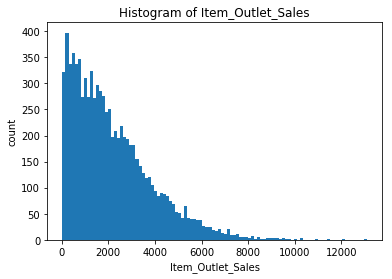

In [8]:
# Explore data Visually to understand the nature of data i terms of distribution of
# the individual variables/features, finding missing values, relationship with other variables and many others
# univariate EDA involves exploring features individually. continuous variables should be done using histogram
# though it is not compulsory and categorical featurs with bar plots

# Since our target variable is continuous, we can visualize by plotting its histogram

plt.hist(train['Item_Outlet_Sales'], bins=100, fill='darkgreen')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('count')
plt.title('Histogram of Item_Outlet_Sales')
plt.show()

# the plot shows the feature is right skewd and would need some data transformation to treat its skewness

Text(0.5,1,'Histogram of Item_Weight')

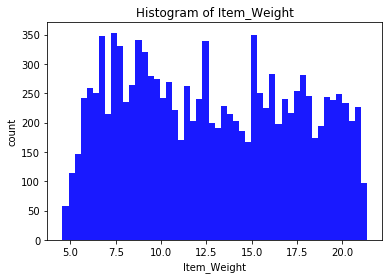

In [9]:
# independent Variables (Numeric variables)
# histogram helps us to visualize the distribution of the variable
Item_Weight = combi['Item_Weight']
fig, ax = plt.subplots()
ax.hist(Item_Weight.dropna(), color='blue', bins=50, alpha=0.9)
plt.xlabel('Item_Weight')
plt.ylabel('count')
plt.title('Histogram of Item_Weight')

# There seems to be no clear-cut pattern in Item_Weight

Text(0.5,1,'Histogram of Item_Visibility')

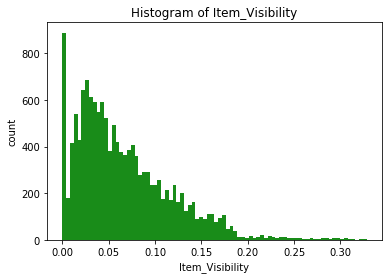

In [10]:
Item_Visibility = combi['Item_Visibility']
fig, ax = plt.subplots()
ax.hist(Item_Visibility.dropna(), color='green', bins=80, alpha=0.9)
plt.xlabel('Item_Visibility')
plt.ylabel('count')
plt.title('Histogram of Item_Visibility')

# Item_Visibility is right skewed and should be transformed t curb its skewness

Text(0.5,1,'Histogram of Item_MRP')

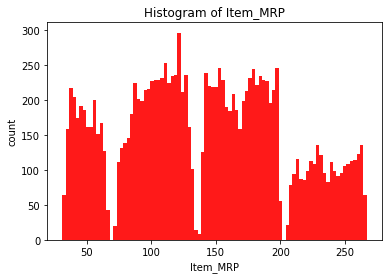

In [11]:
Item_MRP = combi['Item_MRP']
fig, ax = plt.subplots()
ax.hist(Item_MRP.dropna(), color='red', bins=90, alpha=0.9)
plt.xlabel('Item_MRP')
plt.ylabel('count')
plt.title('Histogram of Item_MRP')

# We can clearly see 4 different distributions for Item_Mrp. it is an intresting insight

Text(0.5,1,'Histogram of Item_Fat_Content')

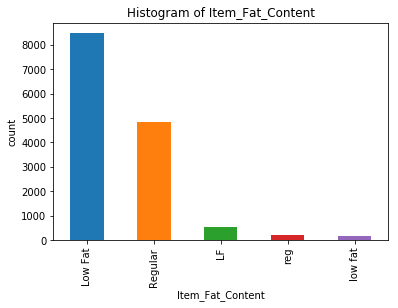

In [12]:
# Gaining insights from categorical variable which can only have a finite set of values
# lets plot the Item_Fat_Content

combi['Item_Fat_Content'].value_counts().plot(kind='bar')

plt.xlabel('Item_Fat_Content')
plt.ylabel('count')
plt.title('Histogram of Item_Fat_Content')

# Item_Fat_Content

C:\Users\A.A.O\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\A.A.O\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\A.A.O\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Bar Chart of Item_Fat_Content')

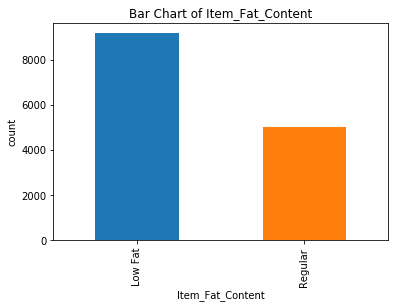

In [13]:
# in the figure LF, Low Fat and low fat are same category and Regular and reg are also the same
# we can combine this and plot again

combi.Item_Fat_Content[combi['Item_Fat_Content'] == 'LF'] = 'Low Fat'
combi.Item_Fat_Content[combi['Item_Fat_Content'] == 'low fat'] = 'Low Fat'

# for regular
combi.Item_Fat_Content[combi['Item_Fat_Content'] == 'reg'] = 'Regular'

# plot again

combi['Item_Fat_Content'].value_counts().plot(kind='bar')

plt.xlabel('Item_Fat_Content')
plt.ylabel('count')
plt.title('Bar Chart of Item_Fat_Content')


Text(0.5,1,'Bar Chart of Item_Fat_Content')

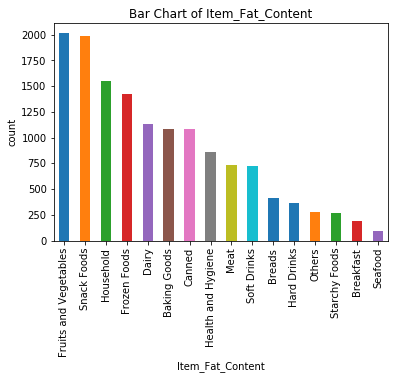

In [14]:
# plot for Item_Type

combi['Item_Type'].value_counts().plot(kind='bar')

plt.xlabel('Item_Fat_Content')
plt.ylabel('count')
plt.title('Bar Chart of Item_Fat_Content')


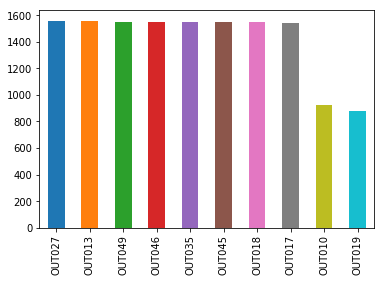

In [15]:
# plot for Outlet_Identifier

combi['Outlet_Identifier'].value_counts().plot(kind='bar')

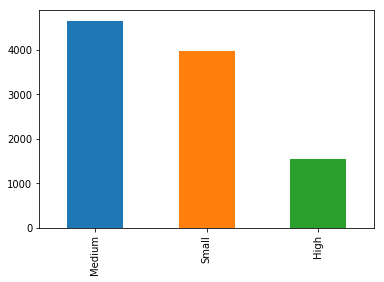

In [16]:
# plot for Outlet_Size

combi['Outlet_Size'].value_counts().plot(kind='bar')

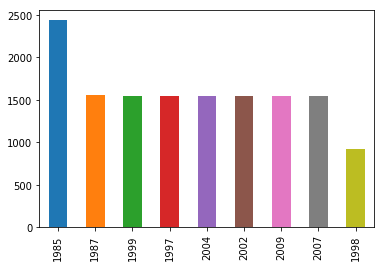

In [17]:
# plot for Establishment_Year
combi.Outlet_Establishment_Year.value_counts().plot(kind = 'bar')

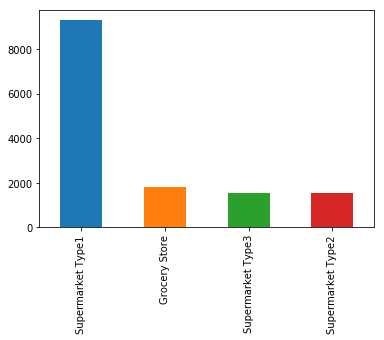

In [18]:
# plot for Outlet_Type
combi['Outlet_Type'].value_counts().plot(kind='bar')

# Bivariate Analysis 

In [19]:
# in Bivariate Analysis we will explore the independent variables with respect to the target variable.
# this hepls to discover hidden patterns between independent and target variable.
# we can then use those findings to deal with missing data imputation and feature engineering

# scatter plots is advisable for the continuous or numeric features while violin plots for categorical

combi.shape

(14204, 12)

(Text(0.5,0,'Item_Weight'),
 Text(0,0.5,'Item_Outlet_Sales'),
 Text(0.5,1,'Item_Weight vs Item_Outlet_Sales'))

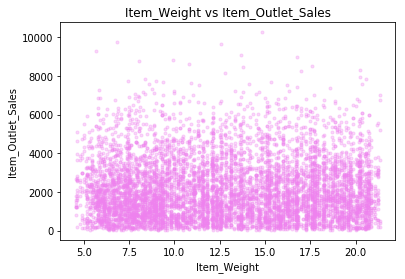

In [20]:
########################## TARGET VARIABLE VS INDEPENDENT VARIABLE ###############################

# Item_Weight vs Item_Outlet_Sales
plt.scatter(combi['Item_Weight'], combi['Item_Outlet_Sales'], c='violet', alpha=0.3, marker='.')
plt.xlabel('Item_Weight'), plt.ylabel('Item_Outlet_Sales'), plt.title('Item_Weight vs Item_Outlet_Sales')

######################## Item_Outlet_Sales is spread well across the entirerang

(Text(0.5,0,'Item_Visibility'),
 Text(0,0.5,'Item_Outlet_Sales'),
 Text(0.5,1,'Item_Visibility vs Item_Outlet_Sales'))

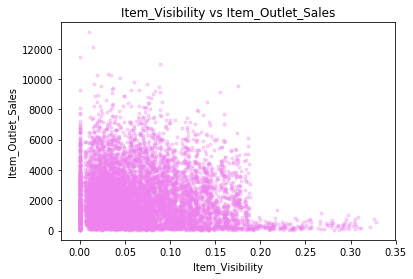

In [21]:

# Item_Visibility vs Item_Outlet_Sales
plt.scatter(combi['Item_Visibility'], combi['Item_Outlet_Sales'], c='violet', alpha=0.3, marker='.')
plt.xlabel('Item_Visibility'), plt.ylabel('Item_Outlet_Sales'), plt.title('Item_Visibility vs Item_Outlet_Sales')

# There is a string of point at 0.0 for Item_visibility which is not possible more into this soon.

(Text(0.5,0,'Item_MRP'),
 Text(0,0.5,'Item_Outlet_Sales'),
 Text(0.5,1,'Item_MRP vs Item_Outlet_Sales'))

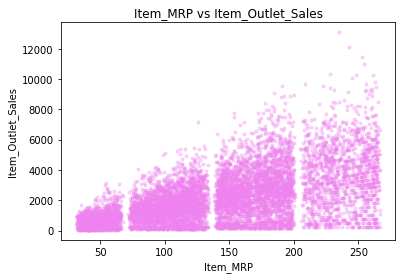

In [22]:

# Item_MRP vs Item_Outlet_Sales
plt.scatter(combi['Item_MRP'], combi['Item_Outlet_Sales'], c='violet', alpha=0.3, marker='.')
plt.xlabel('Item_MRP'), plt.ylabel('Item_Outlet_Sales'), plt.title('Item_MRP vs Item_Outlet_Sales')

# here we can clearly see 4 segments of prices that can be used in feature engineering

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

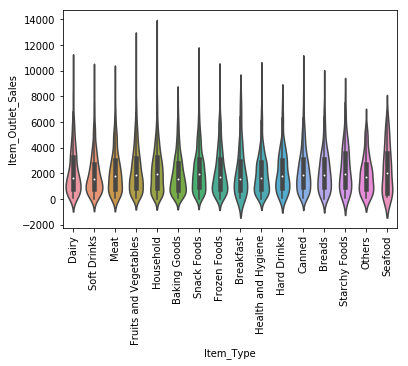

In [23]:
# Visualize Categorical Variables

# check the distribution of the target across all categorical

# violin and boxplot would fit in perfectly, i used violin as it shows full distribution
# the width of a violin at a particular level indicates the concentration or density of data target
# the height tells us about the range of the largest variable values

sns.violinplot(combi['Item_Type'], combi['Item_Outlet_Sales'])
plt.xticks(rotation=90)


C:\Users\A.A.O\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\A.A.O\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\A.A.O\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(array([0, 1]), <a list of 2 Text xticklabel objects>)

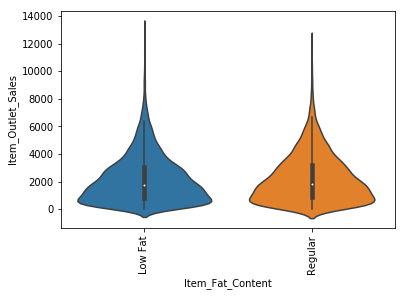

In [24]:
combi.Item_Fat_Content[combi['Item_Fat_Content'] == 'LF'] = 'Low Fat'
combi.Item_Fat_Content[combi['Item_Fat_Content'] == 'low fat'] = 'Low Fat'


combi.Item_Fat_Content[combi['Item_Fat_Content'] == 'reg'] = 'Regular'

sns.violinplot(combi['Item_Fat_Content'], combi['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

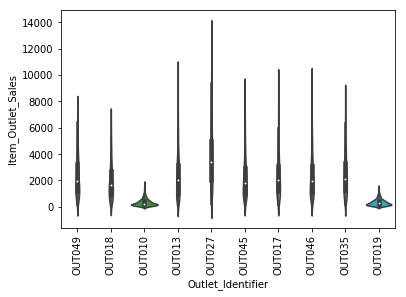

In [25]:

sns.violinplot(combi['Outlet_Identifier'], combi['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

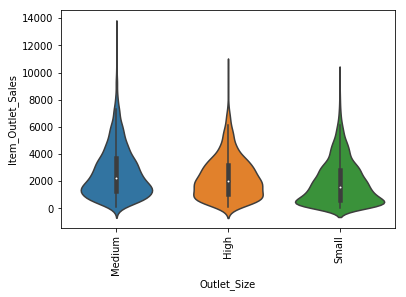

In [26]:

sns.violinplot(combi['Outlet_Size'], combi['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

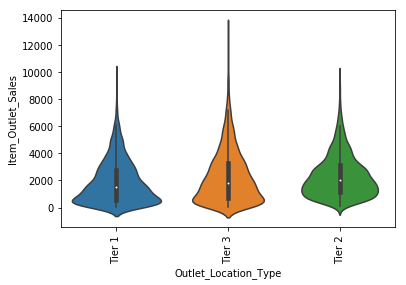

In [27]:

sns.violinplot(combi['Outlet_Location_Type'], combi['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

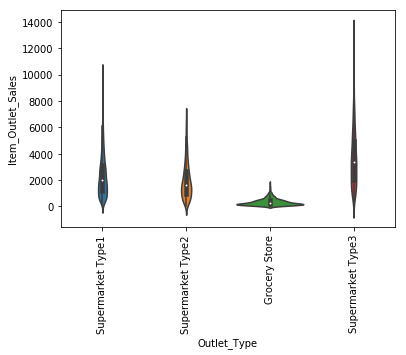

In [28]:

sns.violinplot(combi['Outlet_Type'], combi['Item_Outlet_Sales'])
plt.xticks(rotation=90)

#### Dealing with Missing Values

In [29]:
combi.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [30]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.5+ MB


In [31]:
combi['Item_Weight'] = combi['Item_Weight'].fillna(combi['Item_Weight'].median())


# test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].median())
combi.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

(array([887., 269., 509., 583., 677., 770., 695., 646., 711., 609., 473.,
        545., 484., 450., 419., 423., 467., 379., 290., 347., 286., 272.,
        281., 203., 222., 236., 216., 220., 150., 166., 165., 101., 115.,
         98., 144.,  93., 110.,  98.,  37.,  72.,  19.,  18.,  12.,  18.,
         13.,  22.,  11.,  16.,  13.,   8.,  16.,   8.,  13.,   8.,  10.,
          2.,   7.,   5.,   4.,  12.,   5.,   7.,  10.,  10.,   4.,   7.,
          4.,   0.,   2.,   2.]),
 array([0.        , 0.0046913 , 0.0093826 , 0.0140739 , 0.0187652 ,
        0.0234565 , 0.0281478 , 0.03283909, 0.03753039, 0.04222169,
        0.04691299, 0.05160429, 0.05629559, 0.06098689, 0.06567819,
        0.07036949, 0.07506079, 0.07975209, 0.08444339, 0.08913469,
        0.09382599, 0.09851728, 0.10320858, 0.10789988, 0.11259118,
        0.11728248, 0.12197378, 0.12666508, 0.13135638, 0.13604768,
        0.14073898, 0.14543028, 0.15012158, 0.15481288, 0.15950417,
        0.16419547, 0.16888677, 0.17357807, 0.

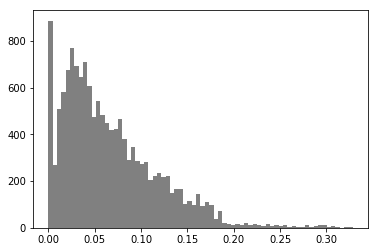

In [32]:
# remember Item_Visibility as lots of 0 values which is not possible
plt.hist(combi['Item_Visibility'], bins=70, color='grey')

In [33]:
# let replace the zeroes and plot again to see the changes
zero_index = combi['Item_Visibility'] == 0

combi['Item_Visibility'] = combi['Item_Visibility'].replace(0, np.mean(combi.Item_Visibility))


(array([ 188.,  480.,  579.,  642.,  720.,  729.,  647.,  639.,  649.,
         579.,  450.,  522.,  428., 1326.,  409.,  461.,  407.,  285.,
         340.,  292.,  323.,  269.,  202.,  234.,  206.,  240.,  225.,
         174.,  150.,  176.,  123.,  109.,  102.,  130.,  104.,   91.,
         129.,   66.,   59.,   44.,   15.,   16.,   13.,   13.,   16.,
          24.,    7.,   20.,   10.,   10.,   14.,    9.,   11.,   10.,
           7.,    2.,   10.,    2.,    4.,   14.,    5.,    5.,   10.,
          10.,    4.,    7.,    4.,    0.,    2.,    2.]),
 array([0.0035747 , 0.00821493, 0.01285516, 0.01749539, 0.02213563,
        0.02677586, 0.03141609, 0.03605632, 0.04069656, 0.04533679,
        0.04997702, 0.05461725, 0.05925748, 0.06389772, 0.06853795,
        0.07317818, 0.07781841, 0.08245864, 0.08709888, 0.09173911,
        0.09637934, 0.10101957, 0.10565981, 0.11030004, 0.11494027,
        0.1195805 , 0.12422073, 0.12886097, 0.1335012 , 0.13814143,
        0.14278166, 0.14742189, 0.15

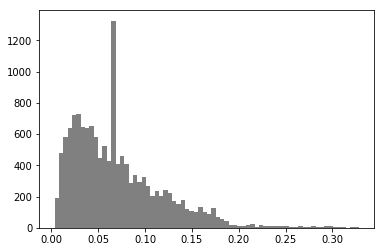

In [34]:
plt.hist(combi['Item_Visibility'], bins=70, color='grey')

## Feature Engineering 

In [35]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables",
              "Meat", "Seafood", 'Snack Foods']

non_perishable = ["Baking Goods", "Canned","Frozen Foods", "Hard Drinks",
                  "Health and Hygeine", "Household", "Soft Drinks"]

# create a new feature 'Item_Type_new'
Item_Type_new = []
for item in combi['Item_Type']:
    if item in perishable:
        Item_Type_new.append('perishable')
    elif item in non_perishable:
        Item_Type_new.append('non_perishable')
    else:
        Item_Type_new.append('not_sure')

In [36]:
# create a new feature 'Item_Type_new'
combi['Item_Type_new'] = Item_Type_new
combi['Item_Type_new']

0            perishable
1        non_perishable
2            perishable
3            perishable
4        non_perishable
5        non_perishable
6            perishable
7            perishable
8        non_perishable
9        non_perishable
10           perishable
11           perishable
12           perishable
13           perishable
14           perishable
15           perishable
16             not_sure
17           perishable
18       non_perishable
19           perishable
20           perishable
21       non_perishable
22       non_perishable
23       non_perishable
24       non_perishable
25       non_perishable
26           perishable
27       non_perishable
28           perishable
29       non_perishable
              ...      
14174          not_sure
14175        perishable
14176        perishable
14177        perishable
14178        perishable
14179        perishable
14180        perishable
14181        perishable
14182    non_perishable
14183        perishable
14184    non_per

In [37]:
# compare Item_Type with first 2 characters of Item_Identifier
sly = combi['Item_Identifier']
print(sly[slice(2)])
# combi[['Item_Type', 'Item_Identifier']]

0    FDA15
1    DRC01
Name: Item_Identifier, dtype: object


In [38]:
# create a new feature 'Outlet_Years'
combi['Outlet_Years'] = 2013 - combi['Outlet_Establishment_Year']
combi['Outlet_Years'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Years, dtype: int64

In [39]:
# create a new feature 'Price_Per_Unit_wt'
combi['Price_Per_Unit_wt'] = combi['Item_MRP'] / combi['Item_Weight']
combi['Price_Per_Unit_wt'].head()

0    26.861204
1     8.153581
2     8.092457
3     9.484115
4     6.031512
Name: Price_Per_Unit_wt, dtype: float64

In [40]:
# create a new feature 'Item_MRP_Clusters'
# combi['Item_MRP_Clusters']
Item_MRP_Clusters = []
for item in combi['Item_MRP']:
    if item < 69:
        Item_MRP_Clusters.append(1)
    elif item >= 69 and item < 136:
        Item_MRP_Clusters.append(2)
    elif item >=136 and item < 203:
        Item_MRP_Clusters.append(3)
    else:
        Item_MRP_Clusters.append(4)
combi['Item_MRP_Clusters'] = Item_MRP_Clusters
combi['Item_MRP_Clusters'].dtype

dtype('int64')

## Encoding Categorical Variables 

In [41]:
# There are 2 options to this
# ## label encoder -- most useful for ordinal categorical variables
# ## one hot encodein -- to get binary form of variables
################################ Using Label Code Encoder ###############################

Outlet_Size_num = []
for item in combi['Outlet_Size']:
    if item == 'Small':
        Outlet_Size_num.append(0)
    elif item == 'Medium':
        Outlet_Size_num.append(1)
    else:
        Outlet_Size_num.append(2)
combi['Outlet_Size_num'] = Outlet_Size_num
combi['Outlet_Size_num'].head()

0    1
1    1
2    1
3    2
4    2
Name: Outlet_Size_num, dtype: int64

In [42]:
Outlet_Location_Size_num = []
for item in combi['Outlet_Location_Type']:
    if item == 'Tier 3':
        Outlet_Location_Size_num.append(0)
    elif item == 'Tier 2':
        Outlet_Location_Size_num.append(1)
    else:
        Outlet_Location_Size_num.append(2)
combi['Outlet_Location_Size_num'] = Outlet_Location_Size_num
combi['Outlet_Location_Size_num'].head()

0    2
1    0
2    2
3    0
4    0
Name: Outlet_Location_Size_num, dtype: int64

In [43]:
Outlet_Type_num = []
for item in combi['Outlet_Type']:
    if item == 'Supermarket Type1':
        Outlet_Type_num.append(1)
    elif item == 'Supermarket Type2':
        Outlet_Type_num.append(2)
    elif item == 'Supermarket Type3':
        Outlet_Type_num.append(3)
    else:
        Outlet_Type_num.append(4)
combi['Outlet_Type_num'] = Outlet_Type_num
combi['Outlet_Type_num'].head()

0    1
1    2
2    1
3    4
4    1
Name: Outlet_Type_num, dtype: int64

In [44]:
# removing categorical variable after label encoding
combi = combi.drop(['Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'], axis=1)
combi.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Type_new',
       'Outlet_Years', 'Price_Per_Unit_wt', 'Item_MRP_Clusters',
       'Outlet_Size_num', 'Outlet_Location_Size_num', 'Outlet_Type_num'],
      dtype='object')

In [45]:
################################# One Nice Hot Encoding -- Baba Dummy ###############################

dummy_cols = ['Outlet_Establishment_Year', 'Item_Type']
combi_cat = pd.get_dummies(combi[dummy_cols])
combi_cat.head()

,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,1999,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1999,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1998,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1987,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [46]:
combi_new = combi.drop(dummy_cols, axis=1)
combi = combi_new.join(combi_cat)
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Type_new,Outlet_Years,Price_Per_Unit_wt,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,3735.1380,perishable,14,26.861204,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,443.4228,non_perishable,4,8.153581,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,2097.2700,perishable,14,8.092457,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.065953,182.0950,OUT010,732.3800,perishable,15,9.484115,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.065953,53.8614,OUT013,994.7052,non_perishable,26,6.031512,...,0,0,0,1,0,0,0,0,0,0


## Preprocessing 

In [47]:
# Removing Skewness by taking logs
combi['Item_Visibility'] = np.log(combi['Item_Visibility'] + 1) # log + 1 to avoid division by zero
combi['Price_Per_Unit_wt'] = np.log(combi['Price_Per_Unit_wt'] + 1)

## Splitting Train set and Test set

In [48]:
train_df = combi[0:len(train)]
test_df = combi[len(train): len(combi)+1]
# test_df['Item_Outlet_Sales'] = np.nan

In [49]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Type_new,Outlet_Years,Price_Per_Unit_wt,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.015920,249.8092,OUT049,3735.1380,perishable,14,3.327235,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019095,48.2692,OUT018,443.4228,non_perishable,4,2.214145,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016621,141.6180,OUT049,2097.2700,perishable,14,2.207445,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.063869,182.0950,OUT010,732.3800,perishable,15,2.349861,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.063869,53.8614,OUT013,994.7052,non_perishable,26,1.950402,...,0,0,0,1,0,0,0,0,0,0


In [50]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Type_new,Outlet_Years,Price_Per_Unit_wt,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
8523,FDW58,20.750,Low Fat,0.007536,107.8622,OUT049,NaN,perishable,14,1.824255,...,0,0,0,0,0,0,0,1,0,0
8524,FDW14,8.300,Regular,0.037708,87.3198,OUT017,NaN,perishable,6,2.444124,...,0,0,0,0,0,0,0,0,0,0
8525,NCN55,14.600,Low Fat,0.094924,241.7538,OUT010,NaN,not_sure,15,2.865537,...,0,0,0,0,0,1,0,0,0,0
8526,FDQ58,7.315,Low Fat,0.015271,155.0340,OUT017,NaN,perishable,6,3.099821,...,0,0,0,0,0,0,0,1,0,0
8527,FDY38,12.600,Regular,0.112077,234.2300,OUT027,NaN,perishable,28,2.975003,...,0,0,0,0,0,0,0,0,0,0


In [51]:
train_dum = pd.get_dummies(train_df[['Item_Fat_Content', 'Item_Type_new']])

In [52]:
test_dum = pd.get_dummies(test_df[['Item_Fat_Content', 'Item_Type_new']])

In [53]:
train_df_new = train_df.drop(['Item_Fat_Content', 'Item_Type_new', 'Outlet_Identifier', 'Item_Identifier'], axis=1)
train_df = train_df_new.join(train_dum)

In [54]:
test_df_new = test_df.drop(['Item_Fat_Content', 'Item_Type_new', 'Outlet_Identifier', 'Item_Identifier'], axis=1)
test_df = test_df_new.join(test_dum)

In [55]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_wt,Item_MRP_Clusters,Outlet_Size_num,Outlet_Location_Size_num,Outlet_Type_num,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066846,140.992782,2181.288914,15.168133,2.447690,2.530212,1.111932,0.887129,1.709492,...,0.019829,0.007509,0.140795,0.052212,0.017365,0.647307,0.352693,0.436701,0.098205,0.465094
std,4.22724,0.044383,62.275067,1706.499616,8.371760,0.562709,0.948261,0.812310,0.812757,1.089985,...,0.139420,0.086334,0.347831,0.222467,0.130634,0.477836,0.477836,0.496006,0.297609,0.498809
min,4.55500,0.003568,31.290000,33.290000,4.000000,0.988059,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.31000,0.032550,93.826500,834.247400,9.000000,2.066804,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.60000,0.060640,143.012800,1794.331000,14.000000,2.489618,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,16.00000,0.090376,185.643700,3101.296400,26.000000,2.822678,3.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,21.35000,0.283968,266.888400,13086.964800,28.000000,3.946922,4.000000,2.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_wt,Item_MRP_Clusters,Outlet_Size_num,Outlet_Location_Size_num,Outlet_Type_num,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable
count,5681.000000,5681.000000,5681.000000,0.0,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.679203,0.066469,141.023273,NaN,15.171097,2.460476,2.529484,1.111776,0.887168,1.709734,...,0.019539,0.004401,0.138884,0.049463,0.021299,0.645661,0.354339,0.441824,0.100334,0.457842
std,4.245342,0.044016,61.809091,NaN,8.372256,0.556906,0.946762,0.812320,0.812824,1.090157,...,0.138421,0.066197,0.345856,0.216852,0.144392,0.478355,0.478355,0.496648,0.300472,0.498263
min,4.555000,0.003585,31.990000,NaN,4.000000,0.980293,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.195000,0.032668,94.412000,NaN,9.000000,2.087827,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.600000,0.060283,141.415400,NaN,14.000000,2.484424,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,15.850000,0.089349,186.026600,NaN,26.000000,2.831235,3.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,21.350000,0.280383,266.588400,NaN,28.000000,3.945665,4.000000,2.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
test_df = test_df.drop('Item_Outlet_Sales', axis=1)

## Model Building 

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [59]:
################ Scaling numeric predictors
from sklearn.preprocessing import scale
scale_combi = scale(train_df)

In [75]:
X = train_df.drop('Item_Outlet_Sales', axis=1).values
y = train_df['Item_Outlet_Sales'].values
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 31)
(1705, 31)
(6818,)
(1705,)


In [76]:
linreg = LinearRegression(n_jobs=7, normalize=True)
%timeit linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


print('MSE:', metrics.mean_squared_error(y_pred, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('MAE:', metrics.mean_absolute_error(y_pred, y_test))

The slowest run took 4.22 times longer than the fastest. This could mean that an intermediate result is being cached.
66 ms ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
MSE: 1552517.2213203951
RMSE: 1246.0004900963704
MAE: 924.9568897499504


In [77]:
las = Lasso(alpha=0.8)
%timeit las.fit(X_train, y_train)
y_pred = las.predict(X_test)


print('MSE:', metrics.mean_squared_error(y_pred, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('MAE:', metrics.mean_absolute_error(y_pred, y_test))

166 ms ± 8.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
MSE: 1545467.384052076
RMSE: 1243.1682846871843
MAE: 923.0135929351271


In [78]:
ridge = Ridge(alpha=0.05)
%timeit ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)


print('MSE:', metrics.mean_squared_error(y_pred, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('MAE:', metrics.mean_absolute_error(y_pred, y_test))

16.8 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
MSE: 1546053.662726767
RMSE: 1243.4040625342861
MAE: 923.0918076034742


## Predicting for test set